In [1]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Import Dataset
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head(3)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000


In [3]:
# Creating a matrix of features for independent variable, and vector of dependent variable
# Indexes in python start with zero
# Removing last column of dataset, which is dependent variable
# as x select only 1st column i.e 'level' upperbound is not included in python
# we use 1:2 as we need matrix not a vector
x = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

In [21]:
print('x shape (matrix of feature): ', x.shape)
print('y shape (vector): ', y.shape)
data_feature_names = [ 'Position Level']

x shape (matrix of feature):  (10, 1)
y shape (vector):  (10,)


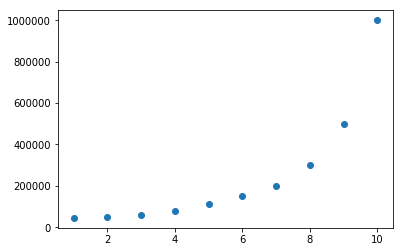

In [5]:
#Plot x and y
plt.scatter(x,y)

In [6]:
# Not required to split data to training and test set as data set contains of only 10 observations
#Fitting Decision Tree Regression to dataset
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [7]:
#  Predict a new result
y_pred = regressor.predict(6.5)
y_pred

array([150000.])

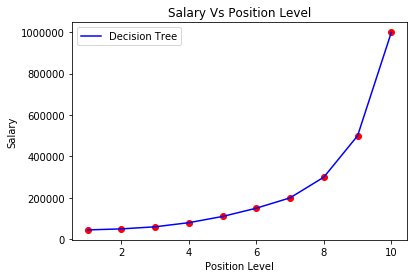

In [8]:
#Visualising Regression Results
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue', label='Decision Tree')
plt.title('Salary Vs Position Level')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()


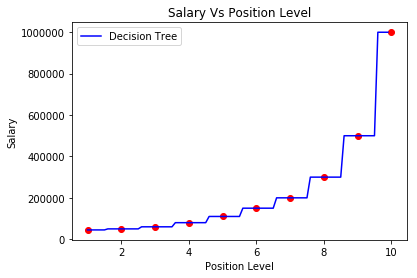

In [9]:
# For better precision, to get a more continuous curve
#Increment from a to 10 with high resolution like 0.1
x_grid = np.arange(min(x), max(x), 0.1)

# We need x_grid as a matrix so we use reshape function
x_grid = x_grid.reshape(len(x_grid), 1)

plt.scatter(x, y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue', label='Decision Tree')
plt.title('Salary Vs Position Level')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()

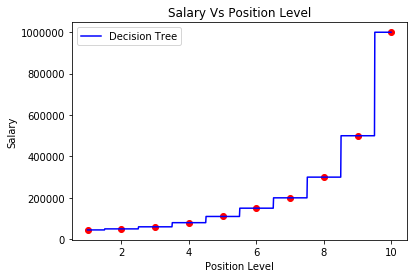

In [10]:
# For better precision, to get a more continuous curve
#Increment from a to 10 with high resolution like 0.1
x_grid = np.arange(min(x), max(x), 0.01)

# We need x_grid as a matrix so we use reshape function
x_grid = x_grid.reshape(len(x_grid), 1)

plt.scatter(x, y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue', label='Decision Tree')
plt.title('Salary Vs Position Level')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()

In [23]:
from sklearn.tree import export_graphviz
import pydotplus as pydot
import collections


dot_data = export_graphviz(regressor,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)

graph = pydot.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
graph.write_png('tree_position_sal.png')

True

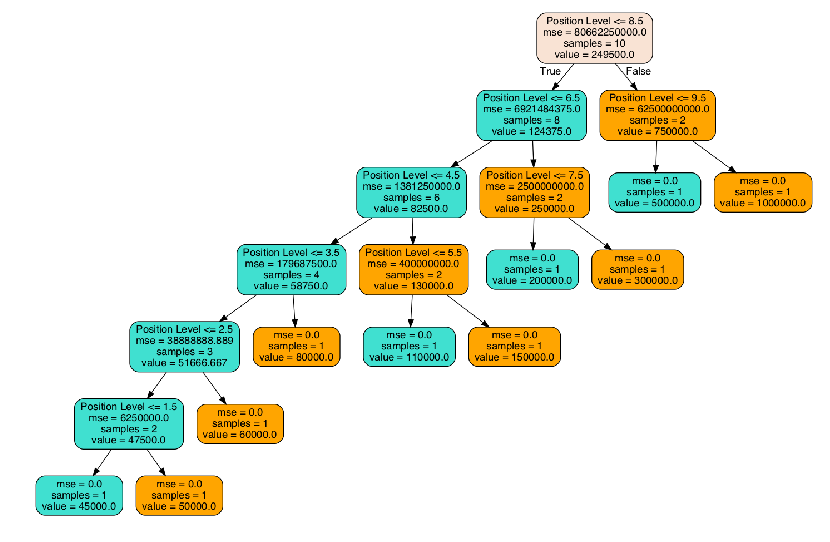

In [24]:
# Display in python
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_position_sal.png'))
plt.axis('off');
plt.show();
